<a href="https://colab.research.google.com/github/Super1305/Classic-Machine-Learning/blob/main/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://bit.ly/FEML-3-GD

## Градиентный спуск

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

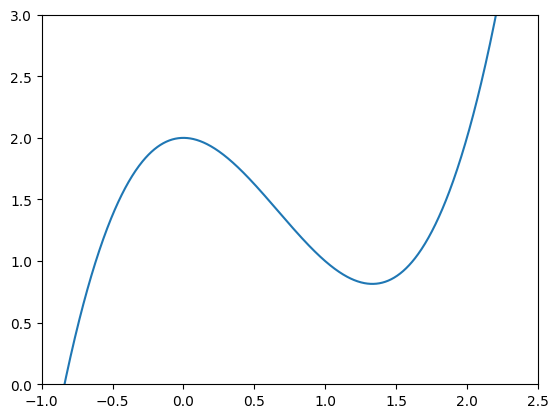

In [ ]:
f = lambda x: x**3 - 2 * x**2 + 2
x = np.linspace(-1, 2.5, 1000)
plt.plot(x,f(x))
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.show()

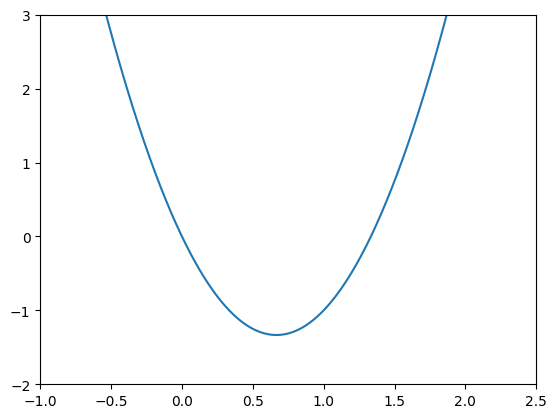

In [ ]:
f_prime = lambda x: 3 * x**2 - 4 * x
x = np.linspace(-1, 2.5, 1000)
plt.plot(x, f_prime(x))
plt.xlim([-1,2.5])
plt.ylim([-2,3])
plt.show()

## Метод градиентного спуска

In [ ]:
lr = 0.1
points = [2]
n_epochs = 15

In [ ]:
for _ in range(n_epochs):
    cur_point = points[-1]
    grad = f_prime(cur_point)
    new_point = cur_point - lr * grad
    points.append(new_point)

In [ ]:
y_points = [f(p) for p in points]

In [ ]:
y_points[:5]

[2, 0.976, 0.8559380480000001, 0.8272703294568053, 0.8188929562322413]

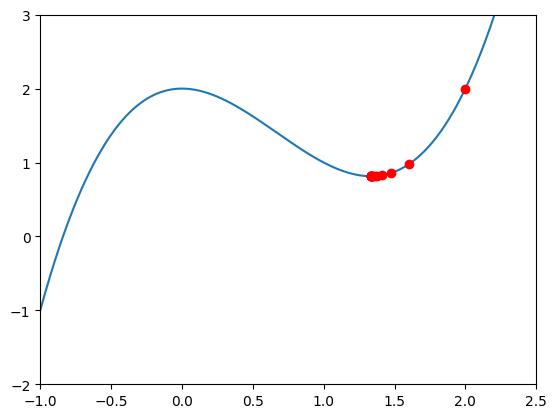

In [ ]:
plt.plot(x,f(x))
plt.plot(points, y_points, 'ro')
plt.xlim([-1,2.5])
plt.ylim([-2,3])
plt.show()

## Практический пример

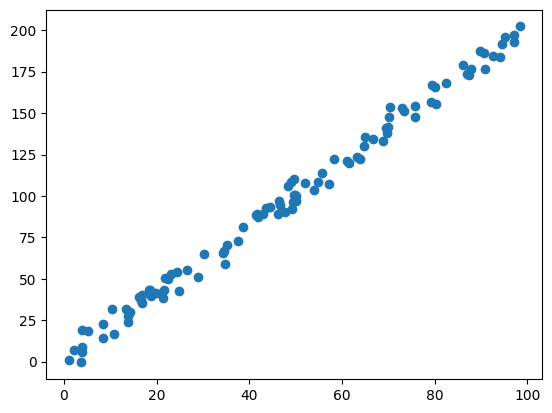

In [ ]:
np.random.seed(9)
N = 100
X = np.random.uniform(low=0, high=100, size=N)
Y = 2*X + 1 + np.random.normal(scale=5, size=N)

plt.scatter(X, Y)
plt.show()

## Применим метод градиентного спуска

In [ ]:
EPOCHS = 20
LEARNING_RATE = 0.0001

In [ ]:
def cost_function(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        pred = theta0 + theta1 * X[i]
        total_cost += (pred - y[i]) ** 2
    return total_cost / len(X)

$$Loss = (θ_0 + θ_1 * x - y)^2 $$

$$\frac{dLoss}{dθ_0} = 2 \cdot (θ_0 + θ_1 * x - y) \cdot 1 $$


$$\frac{dLoss}{dθ_1} = 2 \cdot (θ_0 + θ_1 * x - y) \cdot x $$

In [ ]:
def der_theta0(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        pred = theta0 + theta1 * X[i]
        total_cost += 2 * (pred - y[i])
    return total_cost / len(X)

In [ ]:
def der_theta1(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        pred = theta0 + theta1 * X[i]
        total_cost += 2 * (pred - y[i]) * X[i]
    return total_cost / (len(X))

In [ ]:
theta0 = 1
theta1 = 1

for _ in range(EPOCHS):
    dt0 = der_theta0(X, Y, theta0, theta1)
    dt1 = der_theta1(X, Y, theta0, theta1)

    theta0 = theta0 - LEARNING_RATE * dt0
    theta1 -= LEARNING_RATE * dt1

    print("t0:", theta0, "t1:", theta1, "cost:", cost_function(X, Y, theta0, theta1))

t0: 1.0097041975232817 t1: 1.6223875770441032 cost: 483.27956801340514
t0: 1.013440088092629 t1: 1.8605487151299605 cost: 91.05628098635107
t0: 1.0148921580478567 t1: 1.9516825929435508 cost: 33.624180713388
t0: 1.0154703049837546 t1: 1.9865553365219666 cost: 25.21455780691519
t0: 1.015714037272615 t1: 1.999899315856623 cost: 23.98315040479632
t0: 1.0158298020244274 t1: 2.0050051447248176 cost: 23.80282774264733
t0: 1.0158965978450174 t1: 2.006958580724461 cost: 23.776412292817007
t0: 1.0159446541705357 t1: 2.007705728887126 cost: 23.772533019321905
t0: 1.0159855385318681 t1: 2.007991281566115 cost: 23.77195365223374
t0: 1.0160236773354894 t1: 2.0081002011309135 cost: 23.771857481780916
t0: 1.0160607643806112 t1: 2.008141530667116 cost: 23.771832065532067
t0: 1.0160974478128448 t1: 2.0081569963666315 cost: 23.771817010768963
t0: 1.0161339756502503 t1: 2.008162565084043 cost: 23.77180347436546
t0: 1.0161704427989424 t1: 2.008164346661482 cost: 23.771790161448806
t0: 1.0162068855755488 t

In [ ]:
cost_function(X,Y,10,10)

209557.4431664663

$$Loss = \frac{1}{n}||Xw + w_0 - Y||^{2}$$


где используется $L_{2}$ норма:

$$||X w - Y|| = \sqrt{\sum_{i=1}^n{(X_iw + w_0 - y_i)^2}} $$

$$MSE = \frac{1}{n}\sqrt{\sum_{i=1}^n{(X_iw + w_0 - y_i)^2}} ^{2} = \frac{1}{n}\sum_{i=1}^n{(X_iw + w_0 - y_i)^2}$$

Градиент:

$$\frac{∂ MSE}{∂ w_0} = \frac{2}{n}\sum{({Xw +w_0 - y})}$$

$$\frac{∂ MSE}{∂ w} = \frac{2}{n}\sum{(({Xw + w_0 - y}) \cdot X)}$$


In [ ]:
# x1 x2 x0
# 2  3  1
# 5  3  1
# 7  2  1

In [ ]:
EPOCHS = 20
LEARNING_RATE = 0.0001

costs = []
params = []
preds = []
np.random.seed(9)
params = np.random.normal(size=(2,))
print(params)

list_params_gd = [params.copy()]
for _ in range(EPOCHS):
    predictions = params[0] + params[1] * X
    preds.append(predictions)

    cost = np.sum((predictions - Y) ** 2) / len(predictions)
    costs.append(cost)

    params[0] -= LEARNING_RATE * np.sum(predictions - Y) * (2/len(predictions))
    params[1] -= LEARNING_RATE * np.sum((predictions - Y) * X) * (2/len(predictions))

    list_params_gd.append(params.copy())

[ 0.00110855 -0.28954407]


In [ ]:
costs[-1]

24.37212270385253

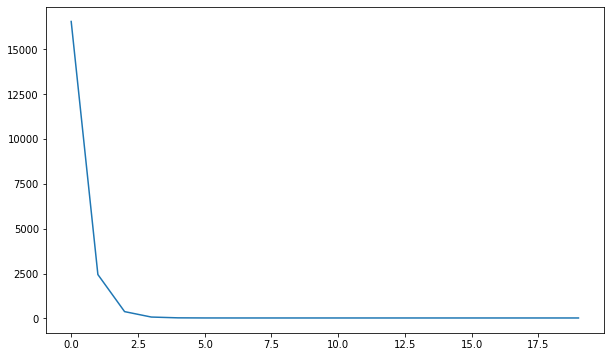

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(costs)
plt.show()

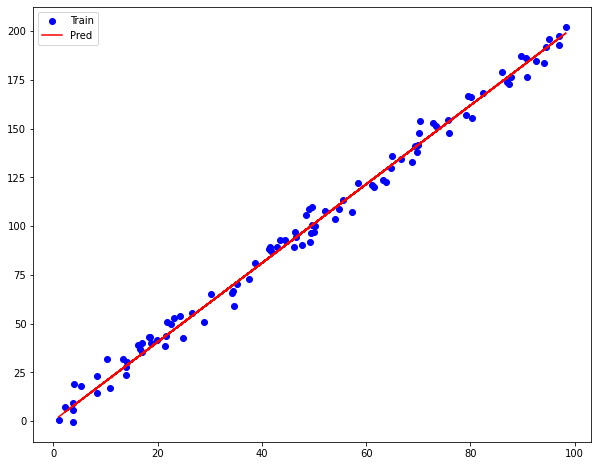

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(X, Y, color='blue', label='Train')
plt.plot(X, preds[19], color='red', label='Pred')
plt.legend()
plt.show()

In [ ]:
params

array([0.03876412, 2.02334814])

## Метод стохастического градиентного спуска

In [ ]:
EPOCHS = 100
LEARNING_RATE = 0.0001

costs = []
params = []
preds = []
np.random.seed(9)
params = np.random.normal(size=(2,))
print(params)
list_params_sgd = [params.copy()]

for _ in range(EPOCHS):
    predictions = params[0] + params[1] * X
    preds.append(predictions)

    cost = np.sum((predictions - Y) ** 2) / len(predictions)
    costs.append(cost)

    i = np.random.choice(len(X))
    current_prediction = params[0] + params[1] * X[i]

    params[0] -= LEARNING_RATE * np.sum(current_prediction - Y[i]) * 2
    params[1] -= LEARNING_RATE * np.sum((current_prediction - Y[i]) * X[i]) * 2

    list_params_sgd.append(params.copy())

[ 0.00110855 -0.28954407]


In [ ]:
costs[-1]

62.629533651263316

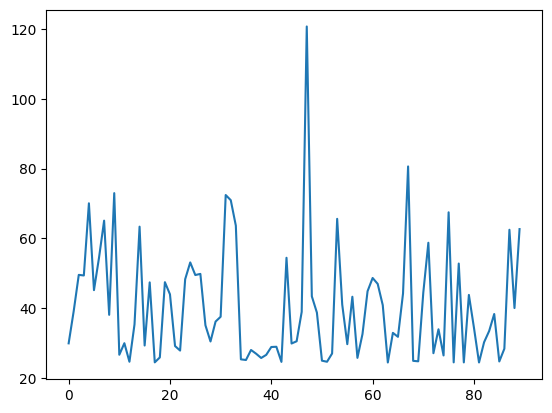

In [ ]:
plt.plot(costs[10:])
plt.show()

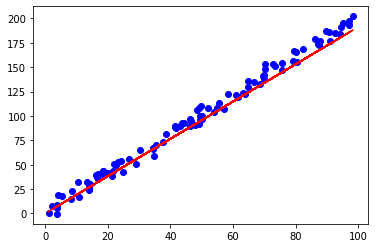

In [ ]:
plt.scatter(X, Y, color='blue')
plt.plot(X, preds[-1], color='red')
plt.show()

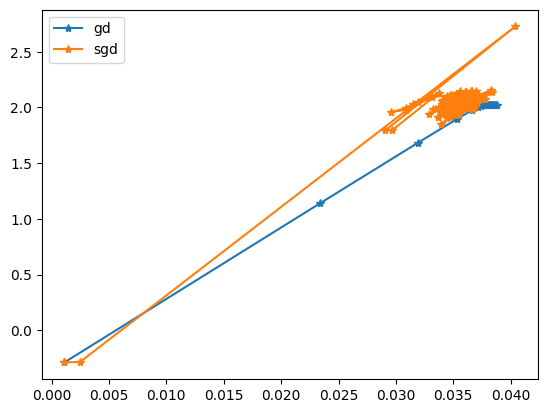

In [ ]:
list_params_sgd = np.array(list_params_sgd)
list_params_gd = np.array(list_params_gd)

plt.plot(list_params_gd[:, 0], list_params_gd[:, 1], marker='*', label='gd')
plt.plot(list_params_sgd[:, 0], list_params_sgd[:, 1], marker='*', label='sgd')
plt.legend()
plt.show()

## **Дополнительные материалы**
1. Методы оптимизации нейронных сетей https://habr.com/ru/post/318970/
2. Реализация линейной регрессии https://www.youtube.com/watch?v=KJA9A1q9l7E
3. Реализация логистической регрессии https://youtu.be/ruVK07YF-RU
4. Метод сопряжённых градиентов (Newton conjugate gradient method) http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D1%81%D0%BE%D0%BF%D1%80%D1%8F%D0%B6%D1%91%D0%BD%D0%BD%D1%8B%D1%85_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2
